<a href="https://colab.research.google.com/github/yunhui666/Kaggle_House_Prediction_MLProject/blob/main/Step5_Modeling_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries


In [ ]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

### Read dataset

In [ ]:
# Load real estate data from CSV
DF = pd.read_csv('data/clean_inputwithfeatures.csv')

In [ ]:
df = DF[DF.SalePrice.isnull() == False]

In [ ]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YrSold,big_house,built_during_recession,sold_during_recession,property_age,property_remodel_age,Alley_Grvl,Alley_Missing,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TownHouse,BsmtCond_Fa,BsmtCond_Gd,...,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,RoofMatl_CompShg,RoofMatl_Other,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_Missing,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,208500.0,0,8,856.0,0,2008,0,0,0,5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500.0,0,6,1262.0,298,2007,0,0,0,31,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,223500.0,0,6,920.0,0,2008,0,0,0,7,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,140000.0,0,7,756.0,0,2006,0,0,0,91,55,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,250000.0,0,9,1145.0,192,2008,0,0,0,8,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


### 1. Linear Regression

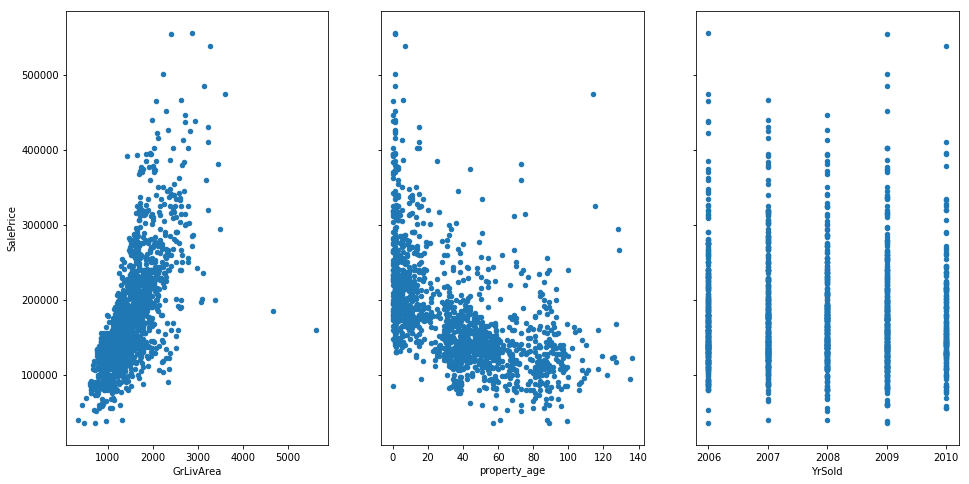

In [ ]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='GrLivArea', y='SalePrice', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='property_age', y='SalePrice', ax=axs[1])
df.plot(kind='scatter', x='YrSold', y='SalePrice', ax=axs[2])

In [ ]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='SalePrice ~ GrLivArea', data=df).fit()

# print the coefficients
lm.params

Intercept    27982.224535
GrLivArea      100.279739
dtype: float64

### Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

In [ ]:
# create a DataFrame with the minimum and maximum values of GrLivArea
X_new = pd.DataFrame({'GrLivArea': [df.GrLivArea.min(), df.GrLivArea.max()]})
X_new.head()

,GrLivArea
0,334
1,5642


In [ ]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     61475.657365
1    593760.512048
dtype: float64

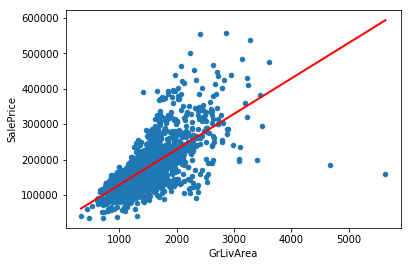

In [ ]:
# first, plot the observed data
df.plot(kind='scatter', x='GrLivArea', y='SalePrice')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [ ]:
# print the R-squared value for the model
lm.rsquared

0.4760925070590861

### 2.Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient

In [ ]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='SalePrice ~ GrLivArea + property_age + YrSold + OverallQual', data=df).fit()

# print the coefficients
lm.params

Intercept      -888345.469493
GrLivArea           55.618164
property_age      -498.927498
YrSold             423.348952
OverallQual      24966.945577
dtype: float64

In [ ]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1043.
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:38:19   Log-Likelihood:                -17396.
No. Observations:                1455   AIC:                         3.480e+04
Df Residuals:                    1450   BIC:                         3.483e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8.883e+05    1.5e+06     -0.592      0.554   -3.83e+06    2.06e+06
GrLivArea       55.6182      2.437     22.823      0.000      50.838      60.398
property_age  -498.9275     40.843    -12.216      0.000    -579.045    -418.810
YrSold         423.3490    747.435      0.566      0.571   -1042.821    1889.519
OverallQual   2.497e+04   1086.301     22.983      0.000    2.28e+04    2.71e+04
==============================================================================
Omnibus:                      284.198   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7720.305
Skew:                           0.056   Prob(JB):                         0.00
Kurtosis:                      14.284   Cond. No.                     3.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple Linear Regression in scikit-learn

In [ ]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

# create X and y
feature_cols = ['GrLivArea','property_age','YrSold','OverallQual']
X = df[feature_cols]
y = df.SalePrice

#fit the model
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# Print intercept and coefficient
print( lm.intercept_ )
print( lm.coef_ )

-888345.4694930012
[   55.61816429  -498.92749845   423.34895208 24966.94557685]


In [ ]:
# check that the coeffients are the expected ones.
m = lm.coef_[0]
m2 = lm.coef_[1]
m3 = lm.coef_[2]
m4 = lm.coef_[3]

b = lm.intercept_
print(' y = {1} + ( x1 * {0} ) + ( x2 * {1} ) + ( x3 * {2} ) + ( x4 * {3} )'.format(m, b, m2, m3, m4))

 y = -888345.4694930012 + ( x1 * 55.618164288436475 ) + ( x2 * -888345.4694930012 ) + ( x3 * -498.927498450231 ) + ( x4 * 423.3489520791834 )


## Split-out validation dataset to Training and Testing

In [ ]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [ ]:
# Create separate object for target variable
y = df.SalePrice

# Create separate object for input features
X = df.drop(['SalePrice','Id'], axis=1)

In [ ]:
type(y)

pandas.core.series.Series

## Train/ Test Split
* You need to split your dataset into a training set and a testing set. You will train your model on the training set and test the model performance on the testing set.
* Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=1)

In [ ]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1091 364 1091 364


In [ ]:
# Summary statistics of X_train
X_train.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YrSold,big_house,built_during_recession,sold_during_recession,property_age,property_remodel_age,Alley_Grvl,Alley_Missing,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TownHouse,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,...,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,RoofMatl_CompShg,RoofMatl_Other,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_Missing,Utilities_NoSeWa
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.00000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,...,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.00000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.0,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.0,1091.000000,1091.00000,1091.000000,1091.000000,1091.000000,1091.000000,1091.0,1091.000000
mean,1160.276810,338.661778,2.792851,2.868011,451.537122,47.633364,0.440880,0.057745,559.421632,21.899175,0.609533,1.556370,472.626031,1.761687,1978.032298,1504.274060,0.373052,1.043996,10427.590284,69.549055,5.335472,56.80110,102.610640,46.168653,6.272227,47.351054,5.618698,6.097159,2.589368,15.420715,6.502291,1058.592117,93.379468,2007.830431,0.008249,0.013749,0.352887,36.541705,13.780935,0.034830,0.937672,0.027498,0.835930,0.020165,0.037580,0.106324,0.031164,0.041247,0.023831,0.000917,...,0.031164,0.159487,0.003666,0.054079,0.027498,0.049496,0.080660,0.016499,0.045830,0.036664,0.059578,0.019248,0.025665,0.008249,0.054079,0.018332,0.927589,0.000917,0.000917,0.00275,0.995417,0.984418,0.015582,0.009166,0.788268,0.006416,0.192484,0.003666,0.0,0.066911,0.001833,0.008249,0.014665,0.829514,0.078827,0.031164,0.003666,0.001833,0.006416,0.003666,0.003666,0.0,0.076994,0.00275,0.869844,0.003666,0.996334,0.999083,0.0,0.000917
std,387.010113,428.360615,28.013548,0.809912,459.077573,167.771140,0.521938,0.237267,439.073108,60.888821,0.650801,0.544601,210.833539,0.733246,24.284034,513.507735,0.495084,0.213937,9656.181807,22.078034,45.564867,41.97133,174.999152,513.274597,2.666501,67.409406,1.120034,1.346317,38.682548,56.148181,1.606393,438.856947,124.077532,1.324999,0.090492,0.116500,0.478087,29.772330,24.294120,0.183434,0.241861,0.163604,0

In [ ]:
# Summary statistics of X_train
X_test.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YrSold,big_house,built_during_recession,sold_during_recession,property_age,property_remodel_age,Alley_Grvl,Alley_Missing,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TownHouse,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,...,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,RoofMatl_CompShg,RoofMatl_Other,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_Missing,Utilities_NoSeWa
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.0,364.000000,364.000000,364.000000,364.0,364.000000,364.0,364.000000,364.000000,364.000000,364.0,364.0,364.0
mean,1156.013736,357.989011,5.304945,2.851648,406.486264,43.939560,0.376374,0.054945,588.280220,22.420330,0.609890,1.574176,468.747253,1.766484,1979.535573,1521.453297,0.403846,1.054945,10654.780220,70.365886,7.450549,57.252747,98.045062,36.054945,6.505495,44.019231,5.450549,6.057692,1.780220,13.662088,6.508242,1038.706044,95.478022,2007.771978,0.008242,0.008242,0.346154,36.967033,13.225275,0.032967,0.936813,0.030220,0.832418,0.024725,0.030220,0.112637,0.030220,0.054945,0.030220,0.002747,...,0.041209,0.140110,0.013736,0.038462,0.021978,0.057692,0.068681,0.019231,0.065934,0.052198,0.057692,0.010989,0.027473,0.005495,0.085165,0.027473,0.887363,0.0,0.002747,0.0,0.997253,0.978022,0.021978,0.008242,0.769231,0.010989,0.197802,0.008242,0.005495,0.074176,0.005495,0.008242,0.010989,0.799451,0.101648,0.024725,0.0,0.0,0.005495,0.002747,0.002747,0.0,0.098901,0.0,0.865385,0.005495,0.994505,1.0,0.0,0.0
std,368.722532,438.660477,33.064390,0.829864,424.251267,141.556544,0.507348,0.239956,447.548484,62.247986,0.617924,0.552972,219.320330,0.780533,23.113091,502.905465,0.523904,0.239956,10871.494298,21.152605,57.134757,43.568531,173.063776,445.103854,2.792645,62.792607,1.088520,1.439112,33.964429,54.202138,1.621970,420.519112,128.220742,1.336162,0.090534,0.090534,0.476398,31.686811,25.163571,0.178796,0.243634,0.171427,0.374009,0.155500,0.171427,0.316584,0.171427,0.228187,0.171427,0.052414,...,0.199046,0.347579,0.116554,0.192572,0.146813,0.233482,0.253260,0.137524,0.2485

## b) Test options and evaluation metric


### Let's try two supervised models: Lasso & Random Forests

In [ ]:
# Linear Regressor
from sklearn.linear_model import Lasso

# Emsemble Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
# Fit and tune model
Lasso = Lasso(alpha = 30, max_iter=100)
Lasso.fit(X_train, y_train)

Lasso(alpha=30, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### Show the first 5 predictions based on the trained model

In [ ]:
Lasso.predict(X_test)[:5]

array([164193.69078417, 350315.07844522, 131552.12785315, 152406.23075138,
       153175.76279772])

In [ ]:
y_test[:5]

1374    167500.0
1354    315000.0
1091    129000.0
918     145900.0
37      153000.0
Name: SalePrice, dtype: float64

In [ ]:
abs(y_test/Lasso.predict(X_test)-1).sum()/len(y_test)

0.1273743276394522

In [ ]:
# Fit and tune model
RandomForestRegressor = RandomForestRegressor(n_estimators = 100,max_features = 'sqrt', max_depth = 10)
RandomForestRegressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
RandomForestRegressor.predict(X_test)[:5]

array([162583.38788029, 360866.11016453, 128859.63782255, 160238.44914326,
       157145.39847115])

In [ ]:
abs(y_test[:5]- RandomForestRegressor.predict(X_test)[:5]).sum()/5

13881.386415218822

## Model Evaluation

In [ ]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
# Predict test set using fitted Lasso
pred_lasso = Lasso.predict(X_test)

In [ ]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred_lasso ))
print( 'MAE:', mean_absolute_error(y_test, pred_lasso))

R^2: 0.8536768731014043
MAE: 18619.206889284855


In [ ]:
# Predict test set using fitted GradientBoostingRegressor
pred_rf = RandomForestRegressor.predict(X_test)

In [ ]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred_rf ))
print( 'MAE:', mean_absolute_error(y_test, pred_rf))

R^2: 0.8713644762626898
MAE: 18805.093883072088


### It seems RF has a better performance than Lasso in this case.